In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
SIZE = 75  #Resize images

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob("E:\\MNIST\\Train\\*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        train_images.append(img)
        train_labels.append(label)

0
E:\MNIST\Train\0\1.jpg
E:\MNIST\Train\0\1000.jpg
E:\MNIST\Train\0\1015.jpg
E:\MNIST\Train\0\1018.jpg
E:\MNIST\Train\0\1028.jpg
E:\MNIST\Train\0\1029.jpg
E:\MNIST\Train\0\1040.jpg
E:\MNIST\Train\0\1046.jpg
E:\MNIST\Train\0\1049.jpg
E:\MNIST\Train\0\1076.jpg
E:\MNIST\Train\0\1078.jpg
E:\MNIST\Train\0\108.jpg
E:\MNIST\Train\0\1090.jpg
E:\MNIST\Train\0\1093.jpg
E:\MNIST\Train\0\1102.jpg
E:\MNIST\Train\0\1107.jpg
E:\MNIST\Train\0\1128.jpg
E:\MNIST\Train\0\1137.jpg
E:\MNIST\Train\0\114.jpg
E:\MNIST\Train\0\1152.jpg
E:\MNIST\Train\0\1168.jpg
E:\MNIST\Train\0\1179.jpg
E:\MNIST\Train\0\118.jpg
E:\MNIST\Train\0\119.jpg
E:\MNIST\Train\0\1195.jpg
E:\MNIST\Train\0\1209.jpg
E:\MNIST\Train\0\121.jpg
E:\MNIST\Train\0\1268.jpg
E:\MNIST\Train\0\1304.jpg
E:\MNIST\Train\0\1310.jpg
E:\MNIST\Train\0\1346.jpg
E:\MNIST\Train\0\1349.jpg
E:\MNIST\Train\0\1359.jpg
E:\MNIST\Train\0\1363.jpg
E:\MNIST\Train\0\1367.jpg
E:\MNIST\Train\0\1368.jpg
E:\MNIST\Train\0\1371.jpg
E:\MNIST\Train\0\1372.jpg
E:\MNIST\Train\0\1

E:\MNIST\Train\1\1002.jpg
E:\MNIST\Train\1\1003.jpg
E:\MNIST\Train\1\1012.jpg
E:\MNIST\Train\1\1017.jpg
E:\MNIST\Train\1\102.jpg
E:\MNIST\Train\1\1031.jpg
E:\MNIST\Train\1\104.jpg
E:\MNIST\Train\1\1044.jpg
E:\MNIST\Train\1\105.jpg
E:\MNIST\Train\1\1051.jpg
E:\MNIST\Train\1\1052.jpg
E:\MNIST\Train\1\1060.jpg
E:\MNIST\Train\1\1065.jpg
E:\MNIST\Train\1\1069.jpg
E:\MNIST\Train\1\1080.jpg
E:\MNIST\Train\1\1081.jpg
E:\MNIST\Train\1\1084.jpg
E:\MNIST\Train\1\1085.jpg
E:\MNIST\Train\1\1095.jpg
E:\MNIST\Train\1\1115.jpg
E:\MNIST\Train\1\1118.jpg
E:\MNIST\Train\1\112.jpg
E:\MNIST\Train\1\1123.jpg
E:\MNIST\Train\1\113.jpg
E:\MNIST\Train\1\1131.jpg
E:\MNIST\Train\1\1132.jpg
E:\MNIST\Train\1\1148.jpg
E:\MNIST\Train\1\1155.jpg
E:\MNIST\Train\1\1174.jpg
E:\MNIST\Train\1\1181.jpg
E:\MNIST\Train\1\1192.jpg
E:\MNIST\Train\1\1197.jpg
E:\MNIST\Train\1\1200.jpg
E:\MNIST\Train\1\1211.jpg
E:\MNIST\Train\1\1230.jpg
E:\MNIST\Train\1\1238.jpg
E:\MNIST\Train\1\124.jpg
E:\MNIST\Train\1\1242.jpg
E:\MNIST\Train\1\1

E:\MNIST\Train\2\1010.jpg
E:\MNIST\Train\2\1011.jpg
E:\MNIST\Train\2\1033.jpg
E:\MNIST\Train\2\1034.jpg
E:\MNIST\Train\2\1047.jpg
E:\MNIST\Train\2\1048.jpg
E:\MNIST\Train\2\1053.jpg
E:\MNIST\Train\2\1058.jpg
E:\MNIST\Train\2\1074.jpg
E:\MNIST\Train\2\109.jpg
E:\MNIST\Train\2\1096.jpg
E:\MNIST\Train\2\1124.jpg
E:\MNIST\Train\2\1129.jpg
E:\MNIST\Train\2\1134.jpg
E:\MNIST\Train\2\1140.jpg
E:\MNIST\Train\2\1143.jpg
E:\MNIST\Train\2\1165.jpg
E:\MNIST\Train\2\117.jpg
E:\MNIST\Train\2\1175.jpg
E:\MNIST\Train\2\1183.jpg
E:\MNIST\Train\2\1188.jpg
E:\MNIST\Train\2\1199.jpg
E:\MNIST\Train\2\120.jpg
E:\MNIST\Train\2\1213.jpg
E:\MNIST\Train\2\122.jpg
E:\MNIST\Train\2\1246.jpg
E:\MNIST\Train\2\1249.jpg
E:\MNIST\Train\2\1255.jpg
E:\MNIST\Train\2\1262.jpg
E:\MNIST\Train\2\1264.jpg
E:\MNIST\Train\2\1270.jpg
E:\MNIST\Train\2\1299.jpg
E:\MNIST\Train\2\1301.jpg
E:\MNIST\Train\2\1330.jpg
E:\MNIST\Train\2\1334.jpg
E:\MNIST\Train\2\1361.jpg
E:\MNIST\Train\2\1374.jpg
E:\MNIST\Train\2\1385.jpg
E:\MNIST\Train\2

E:\MNIST\Train\3\10.jpg
E:\MNIST\Train\3\1007.jpg
E:\MNIST\Train\3\1021.jpg
E:\MNIST\Train\3\1035.jpg
E:\MNIST\Train\3\1055.jpg
E:\MNIST\Train\3\1068.jpg
E:\MNIST\Train\3\107.jpg
E:\MNIST\Train\3\1077.jpg
E:\MNIST\Train\3\1097.jpg
E:\MNIST\Train\3\1108.jpg
E:\MNIST\Train\3\111.jpg
E:\MNIST\Train\3\1119.jpg
E:\MNIST\Train\3\1121.jpg
E:\MNIST\Train\3\1130.jpg
E:\MNIST\Train\3\1144.jpg
E:\MNIST\Train\3\1145.jpg
E:\MNIST\Train\3\1150.jpg
E:\MNIST\Train\3\1151.jpg
E:\MNIST\Train\3\1158.jpg
E:\MNIST\Train\3\1178.jpg
E:\MNIST\Train\3\1185.jpg
E:\MNIST\Train\3\12.jpg
E:\MNIST\Train\3\1201.jpg
E:\MNIST\Train\3\1218.jpg
E:\MNIST\Train\3\1226.jpg
E:\MNIST\Train\3\1233.jpg
E:\MNIST\Train\3\1234.jpg
E:\MNIST\Train\3\1241.jpg
E:\MNIST\Train\3\1244.jpg
E:\MNIST\Train\3\1260.jpg
E:\MNIST\Train\3\1290.jpg
E:\MNIST\Train\3\1295.jpg
E:\MNIST\Train\3\130.jpg
E:\MNIST\Train\3\1312.jpg
E:\MNIST\Train\3\1315.jpg
E:\MNIST\Train\3\1317.jpg
E:\MNIST\Train\3\1320.jpg
E:\MNIST\Train\3\1336.jpg
E:\MNIST\Train\3\13

E:\MNIST\Train\4\1004.jpg
E:\MNIST\Train\4\1006.jpg
E:\MNIST\Train\4\1008.jpg
E:\MNIST\Train\4\1030.jpg
E:\MNIST\Train\4\1037.jpg
E:\MNIST\Train\4\1050.jpg
E:\MNIST\Train\4\1073.jpg
E:\MNIST\Train\4\1079.jpg
E:\MNIST\Train\4\1094.jpg
E:\MNIST\Train\4\1098.jpg
E:\MNIST\Train\4\1099.jpg
E:\MNIST\Train\4\1110.jpg
E:\MNIST\Train\4\1133.jpg
E:\MNIST\Train\4\1149.jpg
E:\MNIST\Train\4\115.jpg
E:\MNIST\Train\4\1160.jpg
E:\MNIST\Train\4\1163.jpg
E:\MNIST\Train\4\1164.jpg
E:\MNIST\Train\4\1171.jpg
E:\MNIST\Train\4\1172.jpg
E:\MNIST\Train\4\1176.jpg
E:\MNIST\Train\4\1180.jpg
E:\MNIST\Train\4\1187.jpg
E:\MNIST\Train\4\1196.jpg
E:\MNIST\Train\4\1198.jpg
E:\MNIST\Train\4\1203.jpg
E:\MNIST\Train\4\1212.jpg
E:\MNIST\Train\4\1215.jpg
E:\MNIST\Train\4\1220.jpg
E:\MNIST\Train\4\1227.jpg
E:\MNIST\Train\4\1232.jpg
E:\MNIST\Train\4\1248.jpg
E:\MNIST\Train\4\1253.jpg
E:\MNIST\Train\4\1258.jpg
E:\MNIST\Train\4\1261.jpg
E:\MNIST\Train\4\127.jpg
E:\MNIST\Train\4\1271.jpg
E:\MNIST\Train\4\1273.jpg
E:\MNIST\Train

E:\MNIST\Train\5\1206.jpg
E:\MNIST\Train\5\1210.jpg
E:\MNIST\Train\5\1222.jpg
E:\MNIST\Train\5\1245.jpg
E:\MNIST\Train\5\1263.jpg
E:\MNIST\Train\5\1265.jpg
E:\MNIST\Train\5\1276.jpg
E:\MNIST\Train\5\1278.jpg
E:\MNIST\Train\5\1283.jpg
E:\MNIST\Train\5\1285.jpg
E:\MNIST\Train\5\1288.jpg
E:\MNIST\Train\5\1298.jpg
E:\MNIST\Train\5\1311.jpg
E:\MNIST\Train\5\1313.jpg
E:\MNIST\Train\5\132.jpg
E:\MNIST\Train\5\1324.jpg
E:\MNIST\Train\5\1325.jpg
E:\MNIST\Train\5\1328.jpg
E:\MNIST\Train\5\1340.jpg
E:\MNIST\Train\5\1356.jpg
E:\MNIST\Train\5\138.jpg
E:\MNIST\Train\5\1382.jpg
E:\MNIST\Train\5\1402.jpg
E:\MNIST\Train\5\1406.jpg
E:\MNIST\Train\5\1413.jpg
E:\MNIST\Train\5\1420.jpg
E:\MNIST\Train\5\1430.jpg
E:\MNIST\Train\5\1433.jpg
E:\MNIST\Train\5\1442.jpg
E:\MNIST\Train\5\145.jpg
E:\MNIST\Train\5\1467.jpg
E:\MNIST\Train\5\1468.jpg
E:\MNIST\Train\5\1481.jpg
E:\MNIST\Train\5\1482.jpg
E:\MNIST\Train\5\1485.jpg
E:\MNIST\Train\5\1490.jpg
E:\MNIST\Train\5\1509.jpg
E:\MNIST\Train\5\1514.jpg
E:\MNIST\Train\

E:\MNIST\Train\6\1041.jpg
E:\MNIST\Train\6\106.jpg
E:\MNIST\Train\6\1070.jpg
E:\MNIST\Train\6\1091.jpg
E:\MNIST\Train\6\1092.jpg
E:\MNIST\Train\6\1100.jpg
E:\MNIST\Train\6\1113.jpg
E:\MNIST\Train\6\1117.jpg
E:\MNIST\Train\6\1136.jpg
E:\MNIST\Train\6\1139.jpg
E:\MNIST\Train\6\1146.jpg
E:\MNIST\Train\6\1159.jpg
E:\MNIST\Train\6\1182.jpg
E:\MNIST\Train\6\1184.jpg
E:\MNIST\Train\6\1189.jpg
E:\MNIST\Train\6\1190.jpg
E:\MNIST\Train\6\1202.jpg
E:\MNIST\Train\6\1204.jpg
E:\MNIST\Train\6\1224.jpg
E:\MNIST\Train\6\1228.jpg
E:\MNIST\Train\6\1240.jpg
E:\MNIST\Train\6\1257.jpg
E:\MNIST\Train\6\126.jpg
E:\MNIST\Train\6\1266.jpg
E:\MNIST\Train\6\1269.jpg
E:\MNIST\Train\6\129.jpg
E:\MNIST\Train\6\1297.jpg
E:\MNIST\Train\6\13.jpg
E:\MNIST\Train\6\1303.jpg
E:\MNIST\Train\6\1309.jpg
E:\MNIST\Train\6\1318.jpg
E:\MNIST\Train\6\1323.jpg
E:\MNIST\Train\6\1327.jpg
E:\MNIST\Train\6\1337.jpg
E:\MNIST\Train\6\1350.jpg
E:\MNIST\Train\6\1358.jpg
E:\MNIST\Train\6\1366.jpg
E:\MNIST\Train\6\1389.jpg
E:\MNIST\Train\6\

E:\MNIST\Train\7\1001.jpg
E:\MNIST\Train\7\101.jpg
E:\MNIST\Train\7\1014.jpg
E:\MNIST\Train\7\1019.jpg
E:\MNIST\Train\7\1022.jpg
E:\MNIST\Train\7\1023.jpg
E:\MNIST\Train\7\103.jpg
E:\MNIST\Train\7\1042.jpg
E:\MNIST\Train\7\1043.jpg
E:\MNIST\Train\7\1054.jpg
E:\MNIST\Train\7\1057.jpg
E:\MNIST\Train\7\1072.jpg
E:\MNIST\Train\7\1075.jpg
E:\MNIST\Train\7\1082.jpg
E:\MNIST\Train\7\1088.jpg
E:\MNIST\Train\7\1106.jpg
E:\MNIST\Train\7\1114.jpg
E:\MNIST\Train\7\1125.jpg
E:\MNIST\Train\7\1126.jpg
E:\MNIST\Train\7\1127.jpg
E:\MNIST\Train\7\1153.jpg
E:\MNIST\Train\7\1154.jpg
E:\MNIST\Train\7\1156.jpg
E:\MNIST\Train\7\1157.jpg
E:\MNIST\Train\7\1166.jpg
E:\MNIST\Train\7\1186.jpg
E:\MNIST\Train\7\1191.jpg
E:\MNIST\Train\7\1205.jpg
E:\MNIST\Train\7\1208.jpg
E:\MNIST\Train\7\1216.jpg
E:\MNIST\Train\7\1217.jpg
E:\MNIST\Train\7\1225.jpg
E:\MNIST\Train\7\1229.jpg
E:\MNIST\Train\7\123.jpg
E:\MNIST\Train\7\1231.jpg
E:\MNIST\Train\7\1251.jpg
E:\MNIST\Train\7\1281.jpg
E:\MNIST\Train\7\1300.jpg
E:\MNIST\Train\

E:\MNIST\Train\8\1025.jpg
E:\MNIST\Train\8\1026.jpg
E:\MNIST\Train\8\1045.jpg
E:\MNIST\Train\8\1059.jpg
E:\MNIST\Train\8\1063.jpg
E:\MNIST\Train\8\1064.jpg
E:\MNIST\Train\8\1067.jpg
E:\MNIST\Train\8\1086.jpg
E:\MNIST\Train\8\1101.jpg
E:\MNIST\Train\8\1105.jpg
E:\MNIST\Train\8\1120.jpg
E:\MNIST\Train\8\1141.jpg
E:\MNIST\Train\8\1170.jpg
E:\MNIST\Train\8\1193.jpg
E:\MNIST\Train\8\1207.jpg
E:\MNIST\Train\8\1214.jpg
E:\MNIST\Train\8\1219.jpg
E:\MNIST\Train\8\1223.jpg
E:\MNIST\Train\8\1236.jpg
E:\MNIST\Train\8\1237.jpg
E:\MNIST\Train\8\1239.jpg
E:\MNIST\Train\8\1247.jpg
E:\MNIST\Train\8\125.jpg
E:\MNIST\Train\8\1254.jpg
E:\MNIST\Train\8\1267.jpg
E:\MNIST\Train\8\1279.jpg
E:\MNIST\Train\8\1289.jpg
E:\MNIST\Train\8\1294.jpg
E:\MNIST\Train\8\1296.jpg
E:\MNIST\Train\8\1319.jpg
E:\MNIST\Train\8\1329.jpg
E:\MNIST\Train\8\1339.jpg
E:\MNIST\Train\8\1344.jpg
E:\MNIST\Train\8\1362.jpg
E:\MNIST\Train\8\137.jpg
E:\MNIST\Train\8\1384.jpg
E:\MNIST\Train\8\1388.jpg
E:\MNIST\Train\8\1404.jpg
E:\MNIST\Train

E:\MNIST\Train\9\1027.jpg
E:\MNIST\Train\9\1036.jpg
E:\MNIST\Train\9\1038.jpg
E:\MNIST\Train\9\1056.jpg
E:\MNIST\Train\9\1061.jpg
E:\MNIST\Train\9\1066.jpg
E:\MNIST\Train\9\1083.jpg
E:\MNIST\Train\9\110.jpg
E:\MNIST\Train\9\1103.jpg
E:\MNIST\Train\9\1112.jpg
E:\MNIST\Train\9\1116.jpg
E:\MNIST\Train\9\1122.jpg
E:\MNIST\Train\9\1138.jpg
E:\MNIST\Train\9\1142.jpg
E:\MNIST\Train\9\1147.jpg
E:\MNIST\Train\9\116.jpg
E:\MNIST\Train\9\1161.jpg
E:\MNIST\Train\9\1167.jpg
E:\MNIST\Train\9\1169.jpg
E:\MNIST\Train\9\1173.jpg
E:\MNIST\Train\9\1177.jpg
E:\MNIST\Train\9\1194.jpg
E:\MNIST\Train\9\1221.jpg
E:\MNIST\Train\9\1235.jpg
E:\MNIST\Train\9\1250.jpg
E:\MNIST\Train\9\1256.jpg
E:\MNIST\Train\9\1272.jpg
E:\MNIST\Train\9\1274.jpg
E:\MNIST\Train\9\1282.jpg
E:\MNIST\Train\9\1284.jpg
E:\MNIST\Train\9\1286.jpg
E:\MNIST\Train\9\1291.jpg
E:\MNIST\Train\9\1292.jpg
E:\MNIST\Train\9\1305.jpg
E:\MNIST\Train\9\1307.jpg
E:\MNIST\Train\9\1316.jpg
E:\MNIST\Train\9\133.jpg
E:\MNIST\Train\9\1333.jpg
E:\MNIST\Train\

In [3]:
#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


In [4]:
# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob("E:\\MNIST\\Test\\*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_images.append(img)
        test_labels.append(fruit_label)

In [5]:
#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [7]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [9]:
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    


In [10]:
x = Flatten()(VGG_model.output)
prediction_layer = Dense(10, activation = 'softmax')(x)

# Make a new model combining both feature extractor and x
model = Model(inputs=VGG_model.input, outputs=prediction_layer)


In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [13]:
from tensorflow import keras
import time


class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [14]:
time_callback = TimeHistory()
history = model.fit(x_train, y_train_one_hot, epochs=5, validation_data = (x_test, y_test_one_hot),callbacks=[time_callback])
times = time_callback.times


Epoch 1/5
157/157 [==============================] - 122s 766ms/step - loss: 0.9958 - accuracy: 0.7754 - val_loss: 0.4867 - val_accuracy: 0.9110
Epoch 2/5
157/157 [==============================] - 119s 757ms/step - loss: 0.3673 - accuracy: 0.9280 - val_loss: 0.3276 - val_accuracy: 0.9300
Epoch 3/5
157/157 [==============================] - 154s 986ms/step - loss: 0.2523 - accuracy: 0.9502 - val_loss: 0.2611 - val_accuracy: 0.9410
Epoch 4/5
157/157 [==============================] - 157s 999ms/step - loss: 0.1997 - accuracy: 0.9574 - val_loss: 0.2174 - val_accuracy: 0.9500
Epoch 5/5
157/157 [==============================] - 119s 760ms/step - loss: 0.1638 - accuracy: 0.9670 - val_loss: 0.1907 - val_accuracy: 0.9570


In [15]:
print(times)

[121.90614771842957, 118.8091790676117, 154.49624824523926, 156.7340714931488, 119.22313070297241]


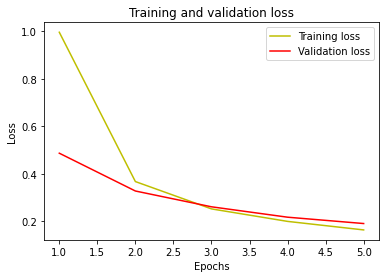

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

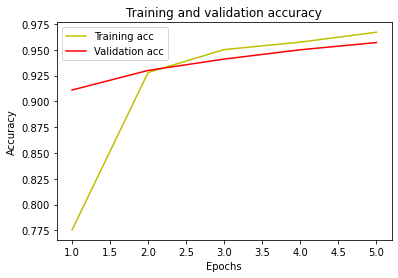

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

[[ 97   0   0   0   1   0   1   0   0   1]
 [  0 100   0   0   0   0   0   0   0   0]
 [  0   1  97   0   0   0   0   2   0   0]
 [  0   0   1  99   0   0   0   0   0   0]
 [  0   1   1   0  93   0   0   3   1   1]
 [  0   0   0   3   0  93   0   4   0   0]
 [  0   0   0   0   0   1  99   0   0   0]
 [  1   0   4   0   0   0   0  92   0   3]
 [  1   0   2   0   0   0   1   0  94   2]
 [  0   1   0   0   1   0   0   4   1  93]]


<AxesSubplot:>

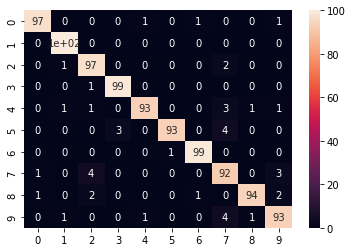

In [19]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True)

In [20]:
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.957


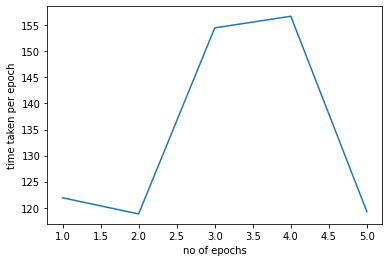

In [21]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = [121.90614771842957, 118.8091790676117, 154.49624824523926, 156.7340714931488, 119.22313070297241]

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("time taken per epoch")
plt.show()


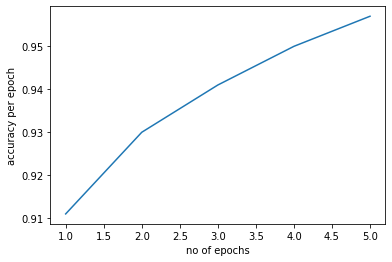

In [25]:
# importing package
import matplotlib.pyplot as plt

# create data
x = [1,2,3,4,5]
y = val_acc

# plot line
plt.plot(x,y)
plt.xlabel("no of epochs")
plt.ylabel("accuracy per epoch")
plt.show()



In [26]:
print(val_acc)

[0.9110000133514404, 0.9300000071525574, 0.9409999847412109, 0.949999988079071, 0.9570000171661377]
